In [17]:
from pathlib import Path

main_path = Path('/home/max/Desktop')

#dem_path = Path('/home/max/Desktop/dem.tif')
#dem_path = Path('/home/max/Desktop/tinitaly_1_1.tif')
dem_path = main_path.joinpath('campania_tinitaly_1_1.tif')

In [2]:
%%time

import xarray as xr

dem = xr.open_mfdataset(
    paths=dem_path,
    chunks={'x': 1000, 'y': 1000},
    parallel=True,
)
dem = dem.rename_vars({'band_data': 'dem'})
dem = dem.rename_dims({'band': 'elevation'})

dem

CPU times: user 1.3 s, sys: 2.11 s, total: 3.41 s
Wall time: 1.04 s


/home/max/.cache/pypoetry/virtualenvs/pygis_blog-iPs2SW5R-py3.10/lib/python3.10/site-packages/xarray/core/dataset.py:265: UserWarning: The specified chunks separate the stored chunks along dimension "x" starting at index 1000. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


<xarray.Dataset>
Dimensions:      (elevation: 1, x: 17977, y: 16370)
Coordinates:
  * band         (elevation) int64 1
  * x            (x) float64 8.992e+05 8.992e+05 ... 1.079e+06 1.079e+06
  * y            (y) float64 4.61e+06 4.61e+06 4.61e+06 ... 4.447e+06 4.447e+06
    spatial_ref  int64 ...
Dimensions without coordinates: elevation
Data variables:
    dem          (elevation, y, x) float32 dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>

In [3]:
# %%time
# 
# dem = dem.fillna(-9999.99)

In [4]:
type(dem)

xarray.core.dataset.Dataset

In [5]:
import matplotlib.pyplot as plt

In [6]:
# %%time
# 
# fig, ax = plt.subplots(figsize=(10, 10))
# dem['dem'].squeeze().plot.imshow(
#     cmap='Blues',
# )
# plt.title("DEM")
# plt.ylabel("Y coordinates (meters)")
# plt.xlabel("X coordinates (meters)")

In [7]:
%%time

from xrspatial.aspect import aspect

dem_aspect = aspect(dem['dem'])

dem_aspect

CPU times: user 555 ms, sys: 35.6 ms, total: 591 ms
Wall time: 640 ms


<xarray.DataArray 'aspect' (elevation: 1, y: 16370, x: 17977)>
dask.array<_trim, shape=(1, 16370, 17977), dtype=float64, chunksize=(1, 1000, 1000), chunktype=numpy.ndarray>
Coordinates:
    band         (elevation) int64 1
  * x            (x) float64 8.992e+05 8.992e+05 ... 1.079e+06 1.079e+06
  * y            (y) float64 4.61e+06 4.61e+06 4.61e+06 ... 4.447e+06 4.447e+06
    spatial_ref  int64 ...
Dimensions without coordinates: elevation
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        1904.0529785156
    STATISTICS_MEAN:           434.61549420131
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         346.04771759263
    STATISTICS_VALID_PERCENT:  46.36

In [11]:
#dem_aspect.min().values

In [12]:
# %%time
# 
# dem_aspect_cleaned = dem_aspect.fillna(-999)
# 
# dem_aspect_cleaned

In [13]:
#dem_aspect_cleaned.min().values

In [14]:
# %%time
# 
# fig2, ax2 = plt.subplots(figsize=(10, 10))
# dem_aspect_cleaned.squeeze().plot.imshow(
#     cmap='Spectral',
# )
# plt.title("Aspect")
# plt.ylabel("Y coordinates (meters)")
# plt.xlabel("X coordinates (meters)")

In [12]:
# from xrspatial.slope import slope
# 
# dem_slope = slope(dem)
# 
# dem_slope

<xarray.DataArray 'slope' (y: 16370, x: 17977)>
dask.array<_trim, shape=(16370, 17977), dtype=float64, chunksize=(512, 512), chunktype=numpy.ndarray>
Coordinates:
    band         int64 1
  * x            (x) float64 8.992e+05 8.992e+05 ... 1.079e+06 1.079e+06
  * y            (y) float64 4.61e+06 4.61e+06 4.61e+06 ... 4.447e+06 4.447e+06
    spatial_ref  int64 ...
    variable     <U9 'band_data'

Text(0.5, 0, 'X coordinates (meters)')

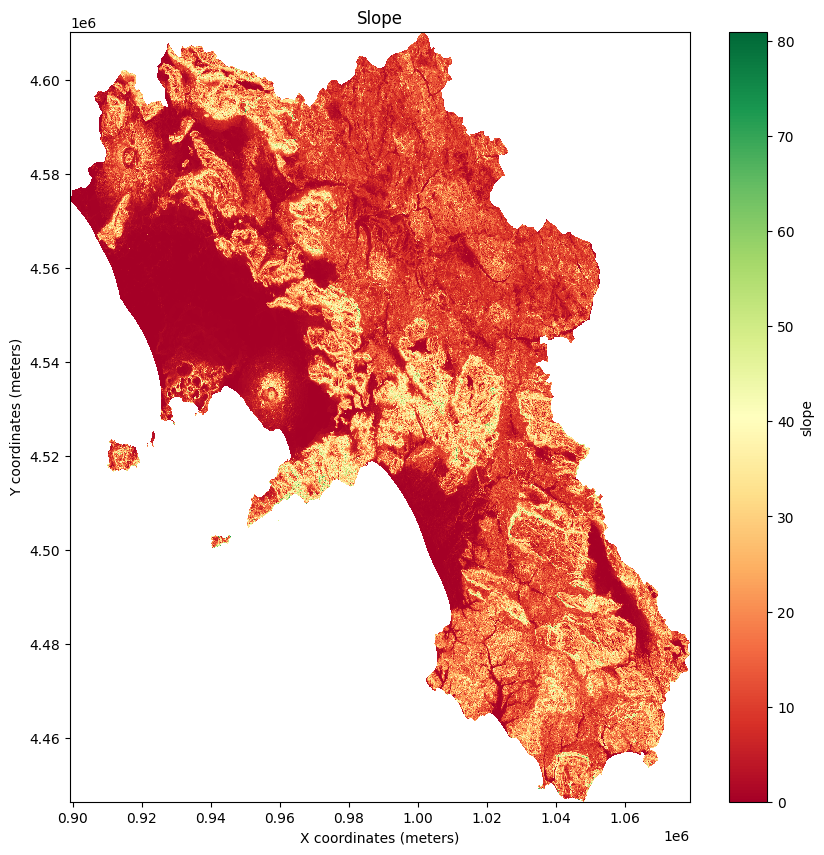

In [13]:
# fig3, ax3 = plt.subplots(figsize=(10, 10))
# dem_slope.plot.imshow(
#     cmap='RdYlGn',
# )
# plt.title("Slope")
# plt.ylabel("Y coordinates (meters)")
# plt.xlabel("X coordinates (meters)")

In [16]:
flaat_dem = dem_aspect.where(dem_aspect > 0, other=0) 
flaat_dem = flaat_dem.where(flaat_dem == 0, other=1) 

flaat_dem

<xarray.DataArray 'aspect' (elevation: 1, y: 16370, x: 17977)>
dask.array<where, shape=(1, 16370, 17977), dtype=float64, chunksize=(1, 1000, 1000), chunktype=numpy.ndarray>
Coordinates:
    band         (elevation) int64 1
  * x            (x) float64 8.992e+05 8.992e+05 ... 1.079e+06 1.079e+06
  * y            (y) float64 4.61e+06 4.61e+06 4.61e+06 ... 4.447e+06 4.447e+06
    spatial_ref  int64 0
Dimensions without coordinates: elevation
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        1904.0529785156
    STATISTICS_MEAN:           434.61549420131
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         346.04771759263
    STATISTICS_VALID_PERCENT:  46.36

In [19]:
type(flaat_dem)

xarray.core.dataarray.DataArray

In [18]:
flaat_dem.astype('float32').rio.to_raster(main_path.joinpath('flat_dem.tif'), driver="GTiff")

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
('wrong tuple length for $46load_attr.20: ', 'expected 2, got 3')
During: typing of exhaust iter at /home/max/.cache/pypoetry/virtualenvs/pygis_blog-iPs2SW5R-py3.10/lib/python3.10/site-packages/xrspatial/aspect.py (27)

File "../../../../../../../home/max/.cache/pypoetry/virtualenvs/pygis_blog-iPs2SW5R-py3.10/lib/python3.10/site-packages/xrspatial/aspect.py", line 27:
def _run_numpy(data: np.ndarray):
    <source elided>
    out[:] = np.nan
    rows, cols = data.shape
    ^


In [ ]:
# fig3, ax3 = plt.subplots(figsize=(10, 10))
# flaat_dem.plot.imshow(
#     cmap='binary',
# )
# plt.title("Horizontal DEM")
# plt.ylabel("Y coordinates (meters)")
# plt.xlabel("X coordinates (meters)")

In [15]:
dem_aspect_cleaned = dem_aspect * horizontal_dem

dem_aspect_cleaned

<xarray.DataArray (y: 16370, x: 17977)>
dask.array<mul, shape=(16370, 17977), dtype=float64, chunksize=(512, 512), chunktype=numpy.ndarray>
Coordinates:
    band         int64 1
  * x            (x) float64 8.992e+05 8.992e+05 ... 1.079e+06 1.079e+06
  * y            (y) float64 4.61e+06 4.61e+06 4.61e+06 ... 4.447e+06 4.447e+06
    spatial_ref  int64 0
    variable     <U9 'band_data'

Text(0.5, 0, 'X coordinates (meters)')

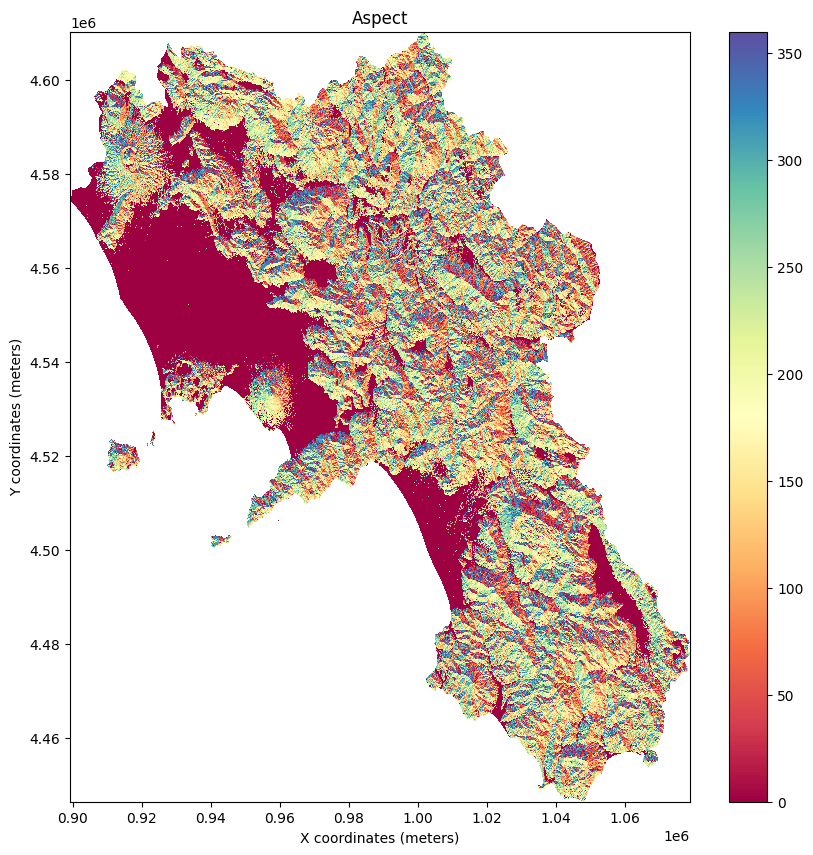

In [16]:
fig4, ax4 = plt.subplots(figsize=(10, 10))
dem_aspect_cleaned.plot.imshow(
    cmap='Spectral',
)
plt.title("Aspect")
plt.ylabel("Y coordinates (meters)")
plt.xlabel("X coordinates (meters)")

In [17]:
south_range = [135, 225]
east_range = [45, 135]
north_1_range = [0, 45]
north_2_range = [315, 360]
west_range = [225, 315]

Text(0.5, 0, 'X coordinates (meters)')

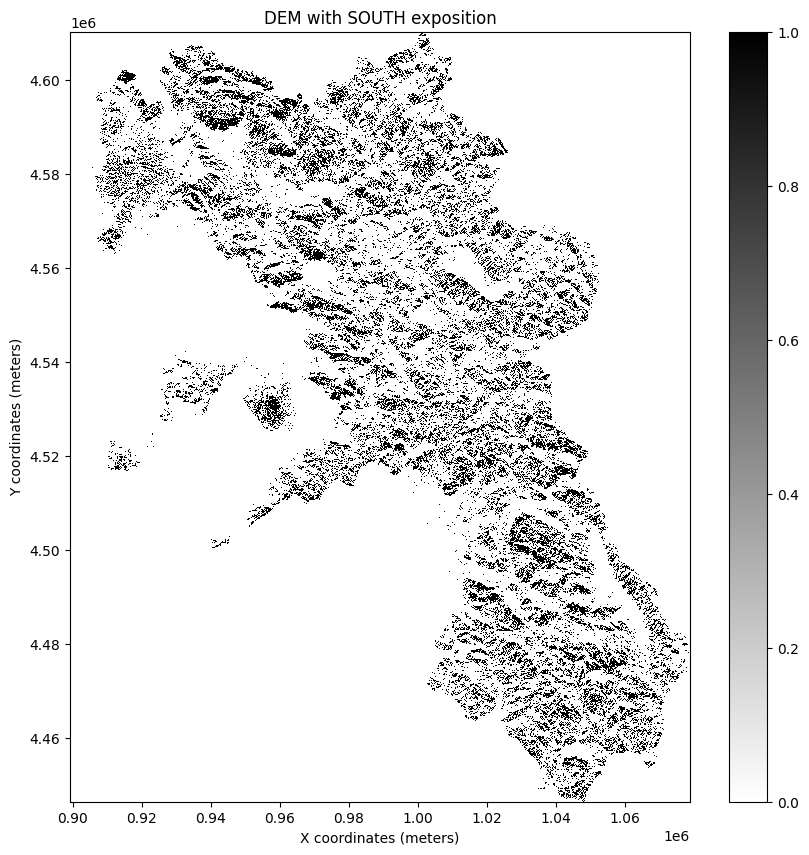

In [18]:
dem_aspect_south = dem_aspect_cleaned.where((dem_aspect_cleaned >= south_range[0]) & (dem_aspect_cleaned < south_range[1]), other=0)
dem_aspect_south = dem_aspect_south.where(dem_aspect_south == 0, other=1)

fig5, ax5 = plt.subplots(figsize=(10, 10))

dem_aspect_south.plot.imshow(
    cmap='binary',
)
plt.title("DEM with SOUTH exposition")
plt.ylabel("Y coordinates (meters)")
plt.xlabel("X coordinates (meters)")

Text(0.5, 0, 'X coordinates (meters)')

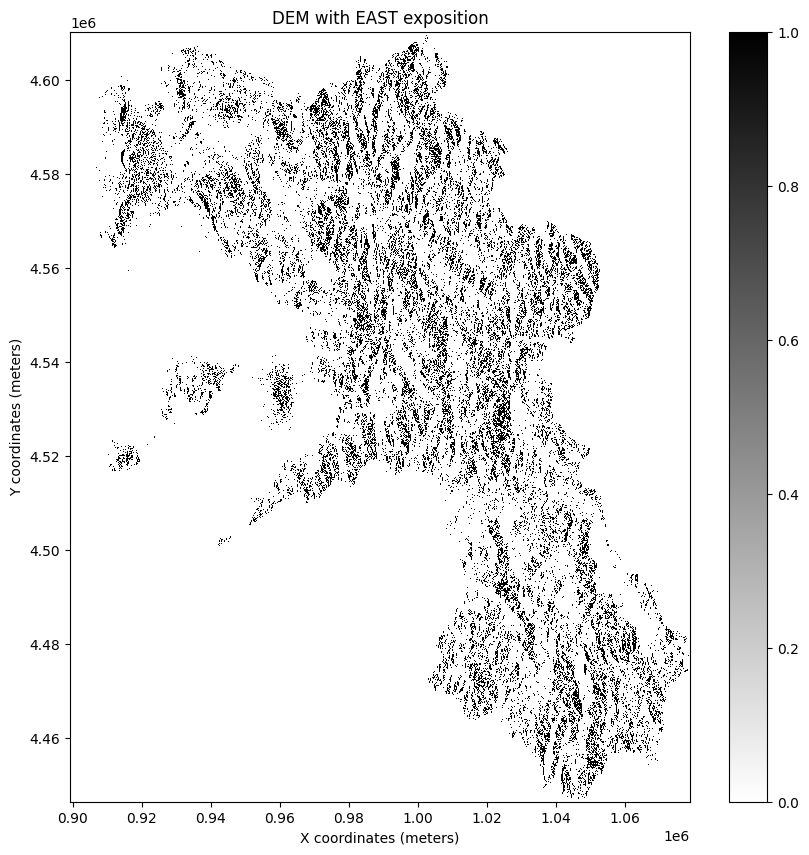

In [19]:
dem_aspect_east = dem_aspect_cleaned.where((dem_aspect_cleaned >= east_range[0]) & (dem_aspect_cleaned < east_range[1]), other=0)
dem_aspect_east = dem_aspect_east.where(dem_aspect_east == 0, other=1)

fig6, ax6 = plt.subplots(figsize=(10, 10))

dem_aspect_east.plot.imshow(
    cmap='binary',
)
plt.title("DEM with EAST exposition")
plt.ylabel("Y coordinates (meters)")
plt.xlabel("X coordinates (meters)")

Text(0.5, 0, 'X coordinates (meters)')

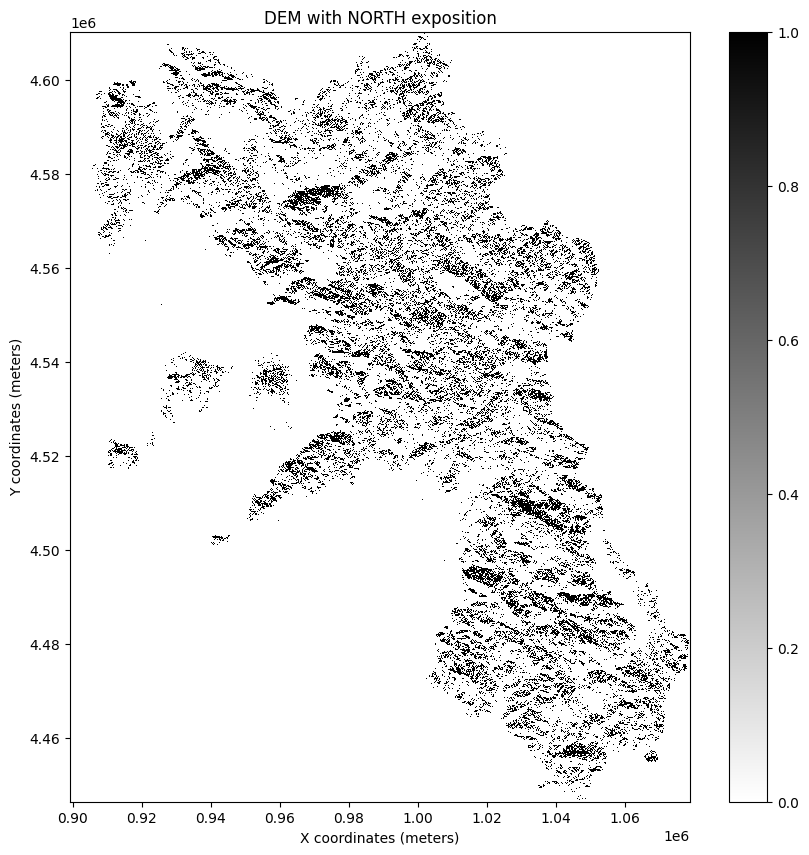

In [20]:
dem_aspect_north_1 = dem_aspect_cleaned.where((dem_aspect_cleaned >= north_1_range[0]) & (dem_aspect_cleaned <= north_1_range[1]), other=0)
dem_aspect_north_1 = dem_aspect_north_1.where(dem_aspect_north_1 == 0, other=1)

dem_aspect_north_2 = dem_aspect_cleaned.where((dem_aspect_cleaned >= north_2_range[0]) & (dem_aspect_cleaned < north_2_range[1]), other=0)
dem_aspect_north_2 = dem_aspect_north_2.where(dem_aspect_north_2 == 0, other=1)

dem_aspect_north =  dem_aspect_north_1 + dem_aspect_north_2

fig7, ax7 = plt.subplots(figsize=(10, 10))

dem_aspect_north.plot.imshow(
    cmap='binary',
)
plt.title("DEM with NORTH exposition")
plt.ylabel("Y coordinates (meters)")
plt.xlabel("X coordinates (meters)")

Text(0.5, 0, 'X coordinates (meters)')

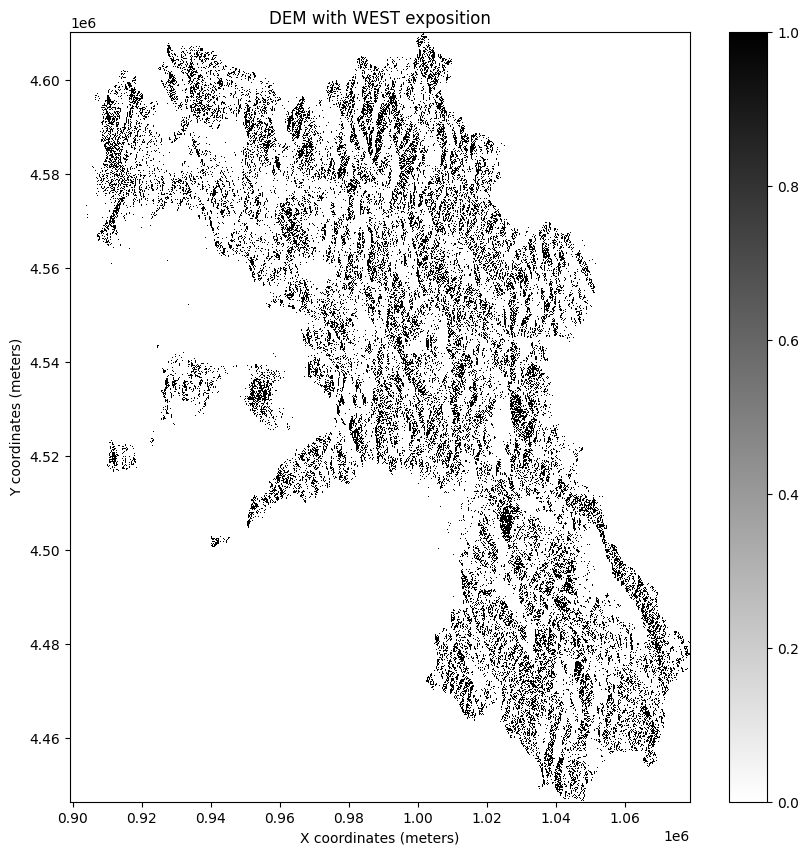

In [21]:
dem_aspect_west = dem_aspect_cleaned.where((dem_aspect_cleaned >= west_range[0]) & (dem_aspect_cleaned < west_range[1]), other=0)
dem_aspect_west = dem_aspect_west.where(dem_aspect_west == 0, other=1)

fig8, ax8 = plt.subplots(figsize=(10, 10))

dem_aspect_west.plot.imshow(
    cmap='binary',
)
plt.title("DEM with WEST exposition")
plt.ylabel("Y coordinates (meters)")
plt.xlabel("X coordinates (meters)")

Text(0.5, 0, 'X coordinates (meters)')

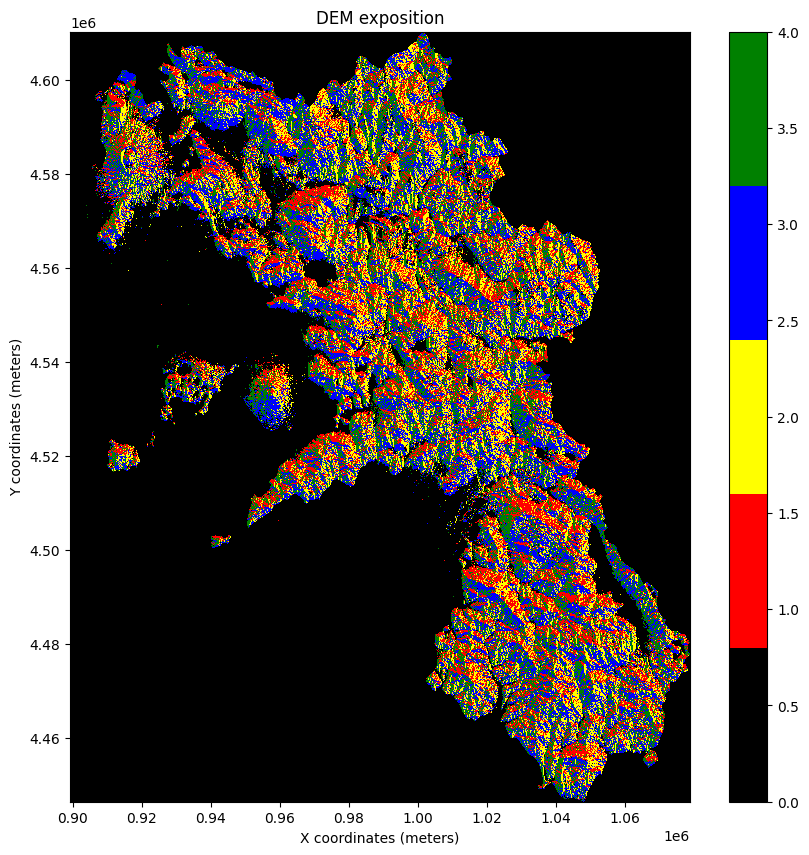

In [22]:
from matplotlib.colors import ListedColormap

dem_aspect_final = dem_aspect_north + (dem_aspect_east * 2) + (dem_aspect_south * 3) + (dem_aspect_west * 4)

fig9, ax9 = plt.subplots(figsize=(10, 10))

dem_aspect_final.plot.imshow(
    cmap=ListedColormap(['black', 'red', 'yellow', 'blue', 'green']),
)
plt.title("DEM exposition")
plt.ylabel("Y coordinates (meters)")
plt.xlabel("X coordinates (meters)")

In [23]:
#dem_aspect_final.count()

In [20]:
from xrspatial.aspect import aspect
import xarray as xr

dem = xr.open_mfdataset(
    paths=dem_path,
    chunks={'x': 1000, 'y': 1000},
    parallel=True,
)
dem = dem.rename_vars({'band_data': 'dem'})
dem = dem.rename_dims({'band': 'elevation'})

dem_aspect = aspect(dem['dem'])

flaat_dem = dem_aspect.where(dem_aspect > 0, other=0) 
flaat_dem = flaat_dem.where(flaat_dem == 0, other=1) 

flaat_dem.astype('float32').rio.to_raster(main_path.joinpath('flat_dem.tif'), driver="GTiff")

/home/max/.cache/pypoetry/virtualenvs/pygis_blog-iPs2SW5R-py3.10/lib/python3.10/site-packages/xarray/core/dataset.py:265: UserWarning: The specified chunks separate the stored chunks along dimension "x" starting at index 1000. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
('wrong tuple length for $46load_attr.20: ', 'expected 2, got 3')
During: typing of exhaust iter at /home/max/.cache/pypoetry/virtualenvs/pygis_blog-iPs2SW5R-py3.10/lib/python3.10/site-packages/xrspatial/aspect.py (27)

File "../../../../../../../home/max/.cache/pypoetry/virtualenvs/pygis_blog-iPs2SW5R-py3.10/lib/python3.10/site-packages/xrspatial/aspect.py", line 27:
def _run_numpy(data: np.ndarray):
    <source elided>
    out[:] = np.nan
    rows, cols = data.shape
    ^
